-------------------------

## The settings file

The Data-Harvester uses a YAML configuration file to perform bulk downloads in a single command.

::: {.callout-caution collapse="true"}
### What is YAML?
[YAML](https://yaml.org/) is a human-readable data-serialization language. It is commonly used for configuration files and in applications where data is being stored or transmitted. YAML files are easy to read and write, and are often used to configure software applications. A typical YAML file looks like this:

```yaml
---
name: "John Smith"
age: 42
occupation: "gardener"
```

Looks familiar? If you have used Markdown or R Markdown, YAML is used to define the metadata for the document.

A YAML configuration file helps to keep track of the data you have downloaded and the analyses you have performed. It also allows you to easily reproduce your analyses and share them with others.
:::



#### Basic usage

Below is the YAML file for `basic_config.yaml` which can be found in the `AgReFed-Workshop/data` folder on the Jupyter Hub Server:

```yaml
outpath: results_basic/
target_bbox: [149.769345, -30.335861, 149.949173, -30.206271]
target_res: 6.0
date_min : 2022-10-01
date_max : 2022-10-30
target_sources:
  DEA:
  - landsat_barest_earth
```
To run the configuration file, we can use the `harvest.run()` function. The function takes a single argument, `path_to_config`, which is the path to the YAML file. The path can be either relative or absolute.

::: {.callout-caution collapse="true"}

### Relative and absolute path strings
A relative path is a path that is relative to the current working directory. For example, if you are working in the top level home directory, the path to the `basic_config.yaml` file, stored in the `data` folder, is `AgReFed-Workshop/data/basic_config.yaml`.

An absolute path is a path that starts from the root directory. For example, the absolute path to the `basic_config.yaml` file might be `/home/jovyan/AgReFed-Workshop/data/basic_config.yaml` (note: this is not the actual path to the file).

**Both paths point to the same file.**

Relative paths are useful when you are working in a project directory, as they are shorter and easier to remember. Relative paths also allow you to share your code with others, as they will not need to change the path in the configuration file as long as they are working in the same folder. Absolute paths are useful when you are working in a different directory, or when you are working on a local machine.
:::

Making sure that your path is correct (and it should be, since you are on the Jupyter Lab server), run the code below:

In [ ]:
import geodata_harvester as gh

In [25]:
gh.harvest.run("AgReFed-Workshop/data/basic_config.yaml")

Starting the data harvester -----
ℹ Found the following 1 sources: ['DEA']


⌛ Downloading DEA data...
⚑ landsat_barest_earth.tif already exists, skipping download

🎉 🎉 🎉 Harvest complete 🎉 🎉 🎉


If you run the same config again, the function recognises that a file has been downloaded and will not re-download it. This is useful if you want to re-run the configuration file to add more data sources -- we will see this in action later.

#### Adding multiple data sources

Additional data sources can be added to the configuration file by adding a new key to the `target_sources` list. Below we have added sources from DEM, Landscape, SILO and SLGA collections. Copy the new lines and add them to `basic_config.yaml`:

```yaml
outpath: results_basic/
target_bbox: [149.769345, -30.335861, 149.949173, -30.206271]
target_res: 6.0
date_min : 2022-10-01
date_max : 2022-11-30
target_sources:
  DEA:
  - landsat_barest_earth
  # add the new lines below --------------------
  DEM: [DEM]
  Landscape: [Relief_300m]
  SILO:
    monthly_rain: [sum]
  SLGA:
    Bulk_Density: [0-5cm]
    Clay: [0-5cm]
```

Let's run the above configuration file and preview the output data. You should already have the `DEA` data downloaded, so the function will only download the new data sources. This time, the argument `preview = True` will be added to the `harvest.run()` function, which will allow us to preview the data that will be downloaded.

Starting the data harvester -----
ℹ Found the following 5 sources: ['DEA', 'DEM', 'Landscape', 'SILO', 'SLGA']


⌛ Downloading DEA data...
⚑ landsat_barest_earth.tif already exists, skipping download

⌛ Downloading DEM data...
⊙ Retrieving coverage from WCS server 3.5s                                                                     
⚑ DEM_SRTM_1_Second_Hydro_Enforced_2023_01_20.tif already exists, skipping download

⌛ Downloading Landscape data...
⚑ Landscape_Relief_300m.tif already exists, skipping download

⌛ Downloading SILO data...
⚑ monthly_rain for 2022 already exists, skipping download

⌛ Downloading SLGA data...
⚑ SLGA_Bulk_Density_0-5cm.tif already exists, skipping download
⚑ SLGA_Bulk_Density_0-5cm_5percentile.tif already exists, skipping download
⚑ SLGA_Bulk_Density_0-5cm_95percentile.tif already exists, skipping download
⚑ SLGA_Clay_0-5cm.tif already exists, skipping download
⚑ SLGA_Clay_0-5cm_5percentile.tif already exists, skipping download
⚑ SLGA_Clay_0-5cm_95percent

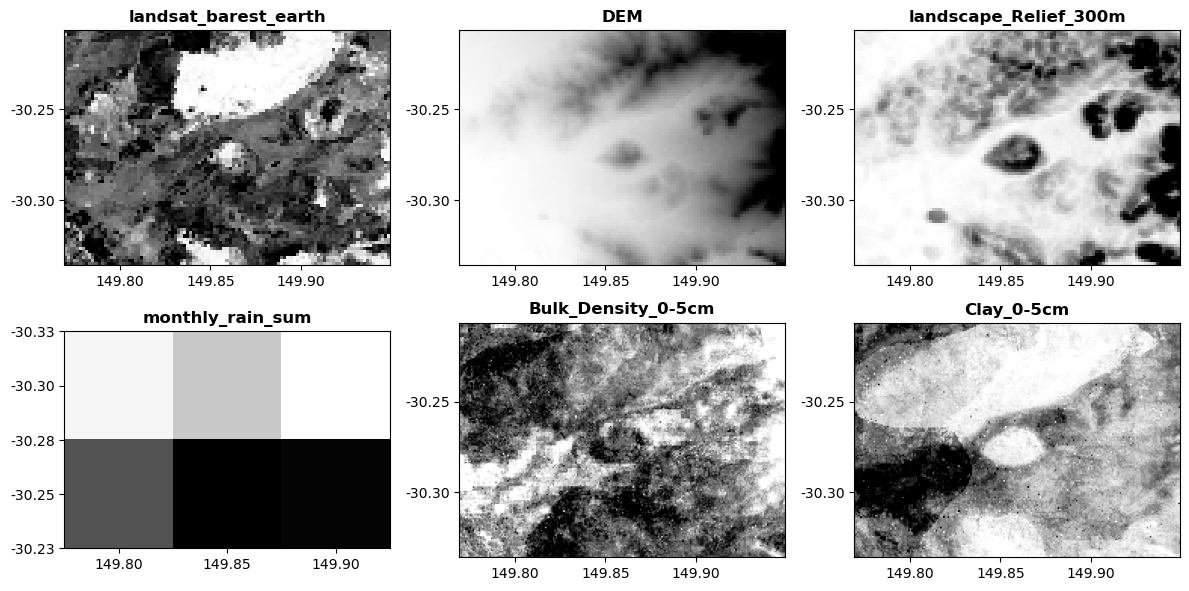


🎉 🎉 🎉 Harvest complete 🎉 🎉 🎉


In [26]:
gh.harvest.run(
    "AgReFed-Workshop/data/basic_config.yaml", 
    log_name = "multi_config", 
    preview = True
)

You should see a figure similar to the one above.
Explore the `results_basic` folder that has been generated. Can you see the log file in there too?


##  [{{< fa person-chalkboard >}} Google Earth Engine]{style="color: green;"}


::: {.callout-tip icon="false"}
## Agenda

- Initialise and authorise our local computer with our GEE credentials.
- Use the YAML configuration file to download data from Google Earth Engine (GEE)
- Discuss GEE options in the YAML

:::

### Initialise GEE
The first step is to make sure you have a Google Earth Engine account. If you had not already set one up with your Google account, [please follow these instructions](https://earthengine.google.com/signup/). In the next step we must do is authorise the geodata_harvester to use the Google Earth Engine API. This is a labourious step, but if you follow the prompts on screen 1-by-1 the process is okay. [See a preview of the process here](https://sydney-informatics-hub.github.io/AgReFed-Workshop/pydocs/setup-gee.html#part-ii-authorising-your-workstation-with-gee). Then run the following code to do it for yourself:

In [1]:
from eeharvest import harvester
harvester.initialise(auth_mode='notebook')

⊙ Initialising Earth Engine... 3.6s                                                                            
✔ Earth Engine authenticated


**NOTE**: You only have to perform this authorisation ONCE. Or at least you only have to do it once per "connection" or if you use an icognito window.

Now back to the content...

### GEE YAML

We will continue to use the same configuration file, `basic_config.yaml`, to download data from **Google Earth Engine**. Below, we add a new key to the `target_sources` list, called `GEE`. Here is a preview for how the YAML configuration file can be used download data from GEE.


```yaml
outpath: results_basic/
target_bbox: [149.769345, -30.335861, 149.949173, -30.206271]
target_res: 6.0
date_min : 2022-10-01
date_max : 2022-10-30
target_sources:
  DEA:
  - landsat_barest_earth
  DEM: [DEM]
  Landscape: [Relief_300m]
  SILO:
    monthly_rain: [sum]
  SLGA:
    Bulk_Density: [0-5cm]
    Clay: [0-5cm]
  # add the new lines below --------------------
  GEE:    
    preprocess:
      collection: LANDSAT/LC09/C02/T1_L2
      mask_clouds: True
      reduce: median
      spectral: NDVI
    download:
      bands: NDVI
```
The configuration will download Landsat 9 images for the year 2021, composite them all to a single image using the `median` reducer, and calculate the `NDVI` spectral index. The output image will be downloaded as a GeoTIFF file, with the `NDVI` spectral index and the RGB bands (`SR_B2`, `SR_B3`, `SR_B4`) includein the raster image.

Run the harvest as before:

In [ ]:
gh.harvest.run(
    "AgReFed-Workshop/data/basic_config.yaml", 
    log_name = "multi_config", 
    preview = True
)

## [{{< fa keyboard >}} Exercise 1: Adding even more sources]{style="color: blue;"}

::: {.callout-note icon="false"}
## {{< fa keyboard >}} On your own

Many different data layers are available for download as long as you know how to call their layer names. Refer to the [YAML Overview](/Settings_Overview.md) section and update the `basic_config.yaml` file to download the following data sources:

- Slope and aspect -- both from the Landscape collection

Then, run `harvest.run()` on the configuration file and preview the output.

:::

::: {.callout-caution icon="false" collapse="true"}
## {{< fa keyboard >}} Solution

```
...
Landscape: [Relief_300m, Slope, Aspect]  # <- edit this line
...
```

:::

## [{{< fa keyboard >}} Exercise 2: GEE]{style="color: blue;"}

::: {.callout-note icon="false"}
## {{< fa keyboard >}} On your own

Let's download from a different data source by referring to the [Earth Engine Data Catalog](https://developers.google.com/earth-engine/datasets/catalog). Have a look at the different sections and tabs (Description
Bands, Image Properties, Terms of Use).

**Task**

Change the `collection` attribute in `basic_config.yaml` to one of [Landsat](https://developers.google.com/earth-engine/datasets/catalog/landsat), [Sentinel](https://developers.google.com/earth-engine/datasets/catalog/sentinel) or [MODIS](https://developers.google.com/earth-engine/datasets/catalog/modis) **surface reflectance** collections. Then, run `harvest.run()` on the configuration file and preview the output.

**Food for thought**

- What happens when you provide an incorrect dataset name or band name?
- Which other attribute(s) needed to be changed in the configuration file to download data from a different collection?

:::


::: {.callout-caution icon="false" collapse="true"}
## {{< fa keyboard >}} Solution

Note that this is one possible solution, out of many. Your instructor may discuss other possible solutions.

```yaml
outpath: results_final/
target_bbox: [149.769345, -30.335861, 149.949173, -30.206271]
target_res: 6.0
date_min : 2022-10-01
date_max : 2022-10-30

target_sources:
  DEA: [landsat_barest_earth]
  DEM: [DEM]
  Landscape: [Relief_300m, Slope, Aspect]
  SILO:
    monthly_rain: [sum]
    max_temp: [sum]
  SLGA:
    Bulk_Density: [0-5cm]
    Clay: [0-5cm]
  GEE:
    preprocess:
      collection: COPERNICUS/S2_SR # edit from LANDSAT/LC09/C02/T1_L2
      mask_clouds: true
      reduce: median
      spectral: [NDVI]
    download:
      bands: [NDVI]
```
:::

## Wrapping up

In this session we have covered setup and using the YAML configuration file to download from multiple API sources. In the [next session](/pydocs/p30-technical), we will cover how to use individual download functions to create custom workflows for downloading data.

See you there!